In [1]:
import math
from math import exp, sqrt,log
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sns.set()

#option pricing 

In [2]:
def binomial_tree (T,n,S,volatility,r):
#upper and down move
  u = exp(volatility * sqrt(T/n))
  d = exp(-volatility*sqrt(T/n))
#probabilities of getting the upper and the down value 
  p = (exp((r)*(T/n))-d)/(u-d)
  q = 1-p
#Binomial tree
  St_Tree=np.zeros((n+1, n+1)) 
  St_Tree[0,0] = S
  for i in range(1,n+1):
    St_Tree[i,0] = St_Tree[i-1, 0]*d
    for j in range(1,i+1):
      St_Tree[i,j] = St_Tree[i-1, j-1]*u



  return (St_Tree, u, d, p, q)
    
  


In [3]:
def CRR_option_price (option_type, call_put, St_Tree,T,n,S,volatility,r, K, u, d, p, q):
  #initialization 
  optionTree = np.zeros((n+1,n+1))
  for j in range(n+1):
  #call_put define the kind of the option if it is a call or a put 
    if call_put== "Call":
            optionTree[n,j] = max(0, St_Tree[n,j]-K)
    elif call_put == "Put":
            optionTree[n,j] = max(0, K-St_Tree[n,j]) 
  for i in range(n-1,-1,-1):
    for j in range(i+1):
      if option_type == "European":

        if call_put=="Call":
                    optionTree[i,j] = exp(-r*(T/n))*(q*optionTree[i+1,j]+p*optionTree[i+1,j+1])
        elif call_put=="Put":
                    optionTree[i,j] = exp(-r*(T/n))*(q*optionTree[i+1,j]+p*optionTree[i+1,j+1])

      elif option_type == "American":

        if call_put=="Call":
          discounted_payoff = exp(-r*(T/n))*(q*optionTree[i+1,j]+p*optionTree[i+1,j+1])
          exercise_payoff = max(St_Tree[i, j] - K, 0)
          optionTree[i,j] = max(exercise_payoff, discounted_payoff)

        elif call_put=="Put":
          discounted_payoff = exp(-r*(T/n))*(q*optionTree[i+1,j]+p*optionTree[i+1,j+1])
          exercise_payoff = max(K - St_Tree[i, j], 0)
          optionTree[i,j] = max(exercise_payoff, discounted_payoff)         
  return optionTree[0,0]          


In [4]:
T=float(input("maturity"))
n=int(input("number of periods"))
S=float(input("Spot"))
volatility=float(input("volatility"))
r=float(input("interest rate"))
K=float(input("strike"))
option_type =input ("European or American")
call_put = input (" Call or Put")

maturity1
number of periods10
Spot50
volatility0.2
interest rate0.05
strike50
European or AmericanEuropean
 Call or PutCall


In [5]:
St_Tree,u,d,p,q=binomial_tree(T,n,S,volatility,r)
print ("the price of the option is :  " ,CRR_option_price(option_type,call_put,St_Tree,T,n,S,volatility,r,K,u,d,p,q))

the price of the option is :   5.126704522435968


#CRR-BS

In [6]:

#choosing a great range of values of n (example 150 )
range_n=[]
for i in range (1,150) :
  range_n.append(i)
L=[]
#for each n we calculate the option price using CRR method 
for n in (range_n):
    St_Tree,u,d,p,q=binomial_tree(T,n,S,volatility,r)
    L.append(CRR_option_price(option_type,call_put,St_Tree,T,n,S,volatility,r,K,u,d,p,q))


In [7]:
def black_Scholes_pricing(S, K, T, r, volatility):   
    S = float(S)
    d1 = (log(S/K)+(r+(0.5*volatility**2))*T)/(volatility*sqrt(T))
    d2 = d1-(volatility*math.sqrt(T))
    option_price = S*stats.norm.cdf(d1,0,1) - K*(exp(-r*T))*stats.norm.cdf(d2,0,1)
    return (option_price)

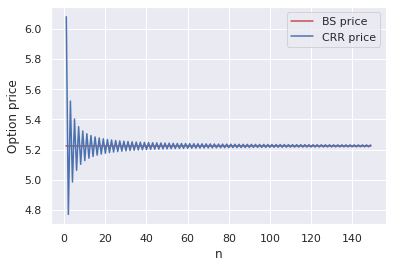

In [8]:
#for each n we calculate the option price using BS method 
price=black_Scholes_pricing(S, K, T, r, volatility)
L_BS=[price for i in range (1,150)]
plt.plot(range_n, L_BS, 'r',label="BS price")
plt.plot(range_n, L, 'b',label="CRR price")
plt.xlabel("n")
plt.ylabel("Option price")
plt.legend()
plt.show()

as we can see the option price using the CRR method converge to the option price using BS when n is big (n= infinite )

**if we try to calculate the difference between the two values (Error) we should find it converge to 0 . let's see !!**

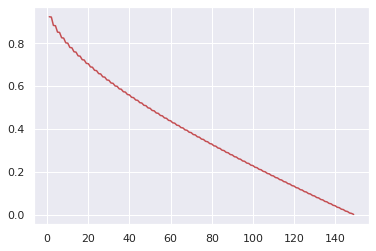

In [10]:
diff=[]
for n in range_n :
    differnce = price - CRR_option_price(option_type,call_put,St_Tree,T,n,S,volatility,r,K,u,d,p,q)
    difference_percent= abs(differnce / price)
    diff.append (difference_percent)
plt.plot(range_n, diff, 'r',label="Difference") 
plt.show()
